In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
!pip install "plotly[express]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 32.3 MB/s eta 0:00:00a 0:00:01


In [6]:
df = pd.read_csv("../../data/intermediate/data_concat.csv", header =0, parse_dates=["month"])

/tmp/ipykernel_32131/2452079848.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/intermediate/data_concat.csv", header =0, parse_dates=["month"])


In [9]:
df.head()

month             town flat_type block       street_name storey_range  \
0 1990-01-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1 1990-01-01  KALLANG/WHAMPOA    3 ROOM    44      BENDEMEER RD     04 TO 06   
2 1990-01-01  KALLANG/WHAMPOA    3 ROOM    20   ST. GEORGE'S RD     04 TO 06   
3 1990-01-01  KALLANG/WHAMPOA    3 ROOM    14       KG ARANG RD     04 TO 06   
4 1990-01-01  KALLANG/WHAMPOA    3 ROOM    46           OWEN RD     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED                 1977        9000.0   
1            63.0        STANDARD                 1981       31400.0   
2            67.0  NEW GENERATION                 1984       66500.0   
3           103.0  NEW GENERATION                 1984       77000.0   
4            68.0  NEW GENERATION                 1982       58000.0   

  remaining_lease  year  
0             NaN  1990  
1             NaN  1990  
2             NaN  1990  
3             NaN  1990  
4             NaN  1990

In [10]:
df["year_of_sales"] = df["month"].dt.year
df["month_of_sales"] = df["month"].dt.month

In [11]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'year_of_sales', 'month_of_sales'],
      dtype='object')

In [15]:
# Desired column order
new_col_order = ['month', 'year_of_sales', 'month_of_sales', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price','remaining_lease', 'year']

In [16]:
# Reorder the columns
df = df[new_col_order]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949511 entries, 0 to 949510
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                949511 non-null  datetime64[ns]
 1   year_of_sales        949511 non-null  int32         
 2   month_of_sales       949511 non-null  int32         
 3   town                 949511 non-null  object        
 4   flat_type            949511 non-null  object        
 5   block                949511 non-null  object        
 6   street_name          949511 non-null  object        
 7   storey_range         949511 non-null  object        
 8   floor_area_sqm       949511 non-null  float64       
 9   flat_model           949511 non-null  object        
 10  lease_commence_date  949511 non-null  int64         
 11  resale_price         949511 non-null  float64       
 12  remaining_lease      240461 non-null  object        
 13  year          

In [19]:
# Convert 'floor_area_sqm' to integer
df['floor_area_sqm'] = df['floor_area_sqm'].astype(int)

In [20]:
df.head()

month  year_of_sales  month_of_sales             town flat_type block  \
0 1990-01-01           1990               1       ANG MO KIO    1 ROOM   309   
1 1990-01-01           1990               1  KALLANG/WHAMPOA    3 ROOM    44   
2 1990-01-01           1990               1  KALLANG/WHAMPOA    3 ROOM    20   
3 1990-01-01           1990               1  KALLANG/WHAMPOA    3 ROOM    14   
4 1990-01-01           1990               1  KALLANG/WHAMPOA    3 ROOM    46   

        street_name storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO AVE 1     10 TO 12              31        IMPROVED   
1      BENDEMEER RD     04 TO 06              63        STANDARD   
2   ST. GEORGE'S RD     04 TO 06              67  NEW GENERATION   
3       KG ARANG RD     04 TO 06             103  NEW GENERATION   
4           OWEN RD     01 TO 03              68  NEW GENERATION   

   lease_commence_date  resale_price remaining_lease  year  
0                 1977        9000.0             NaN  1990  
1                 1981       31400.0             NaN  1990  
2                 1984       66500.0             NaN  1990  
3                 1984       77000.0             NaN  1990  
4                 1982       58000.0             NaN  1990

In [22]:
df.year_of_sales.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025], dtype=int32)

In [21]:
df.query("flat_type == '4 ROOM' & town == 'WOODLANDS' & floor_area_sqm > 100").head()

month  year_of_sales  month_of_sales       town flat_type block  \
555  1990-01-01           1990               1  WOODLANDS    4 ROOM   217   
1841 1990-02-01           1990               2  WOODLANDS    4 ROOM   155   
1853 1990-02-01           1990               2  WOODLANDS    4 ROOM   213   
2797 1990-03-01           1990               3  WOODLANDS    4 ROOM   213   
2847 1990-03-01           1990               3  WOODLANDS    4 ROOM   336   

          street_name storey_range  floor_area_sqm flat_model  \
555    MARSILING CRES     04 TO 06             104    MODEL A   
1841  WOODLANDS ST 13     10 TO 12             107    MODEL A   
1853   MARSILING CRES     04 TO 06             104    MODEL A   
2797   MARSILING CRES     01 TO 03             104    MODEL A   
2847  WOODLANDS AVE 1     07 TO 09             103    MODEL A   

      lease_commence_date  resale_price remaining_lease  year  
555                  1982       78000.0             NaN  1990  
1841                 1985       64000.0             NaN  1990  
1853                 1982       75000.0             NaN  1990  
2797                 1982       58000.0             NaN  1990  
2847                 1985       80000.0             NaN  1990

In [23]:
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

/tmp/ipykernel_32131/3836756993.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

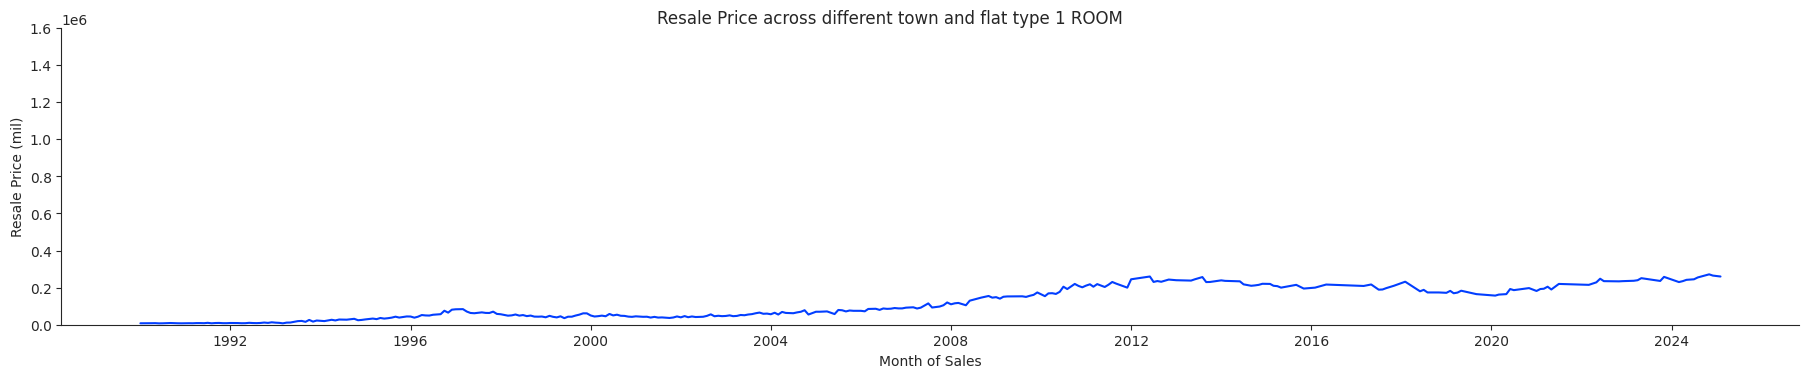

/tmp/ipykernel_32131/3836756993.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

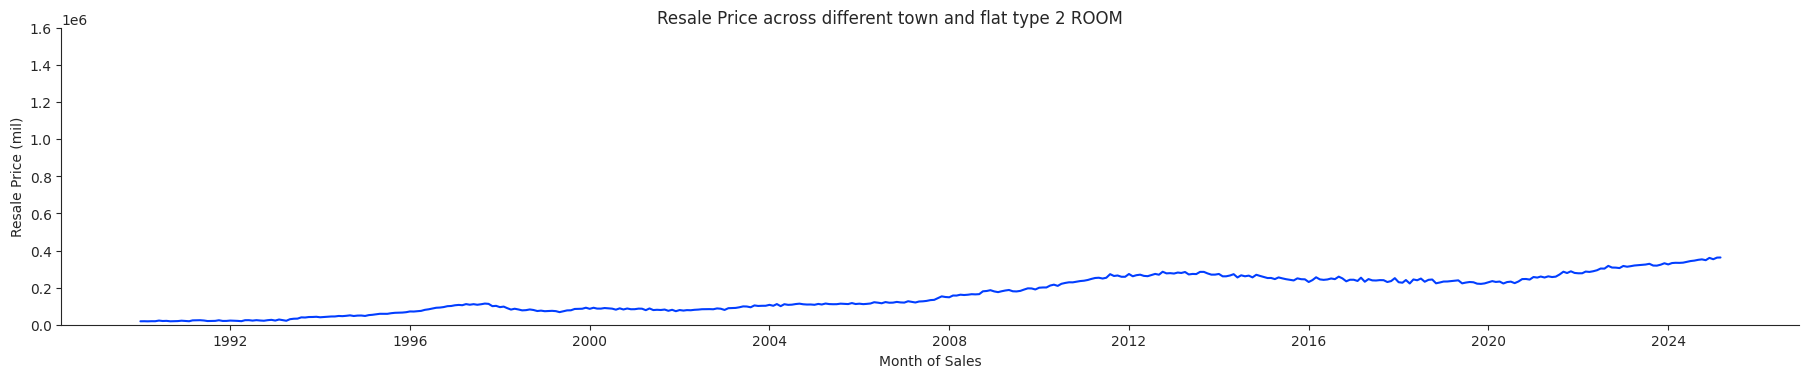

/tmp/ipykernel_32131/3836756993.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

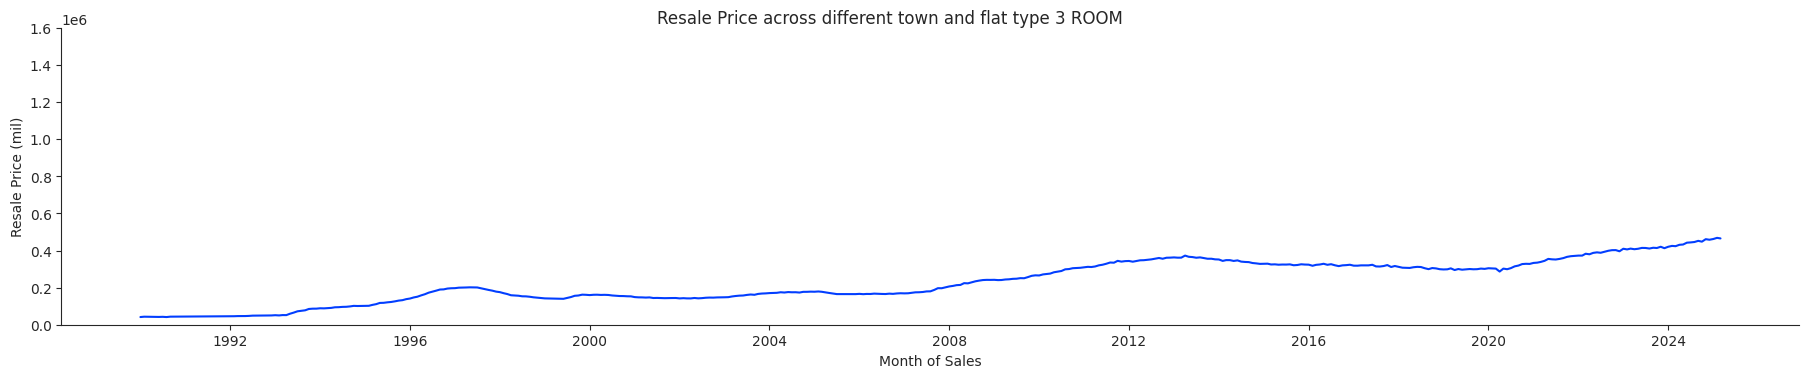

/tmp/ipykernel_32131/3836756993.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

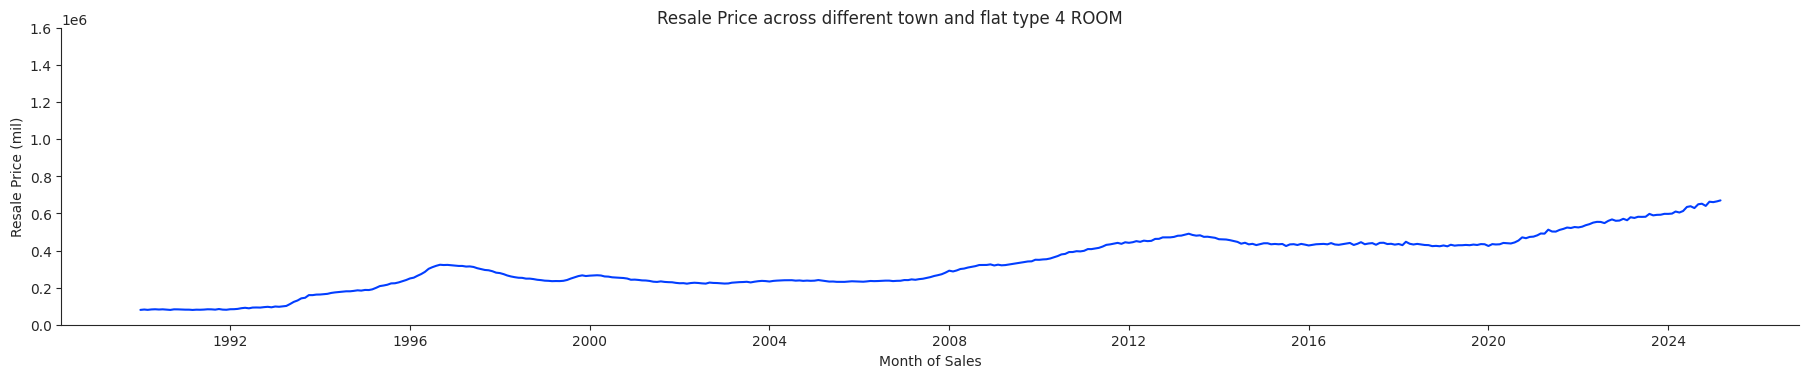

/tmp/ipykernel_32131/3836756993.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

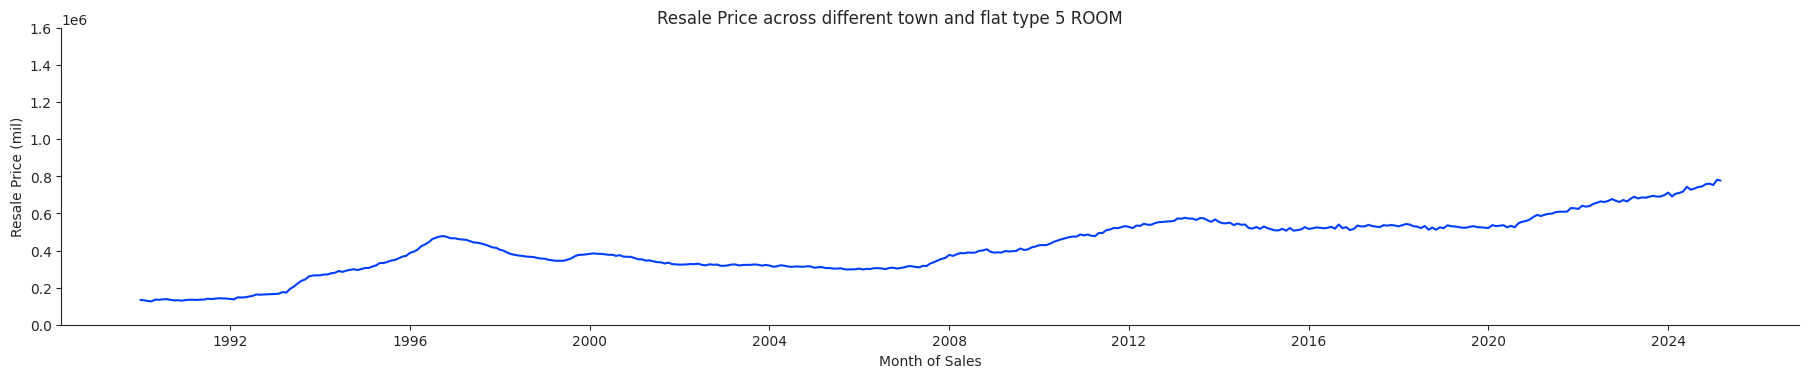

/tmp/ipykernel_32131/3836756993.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

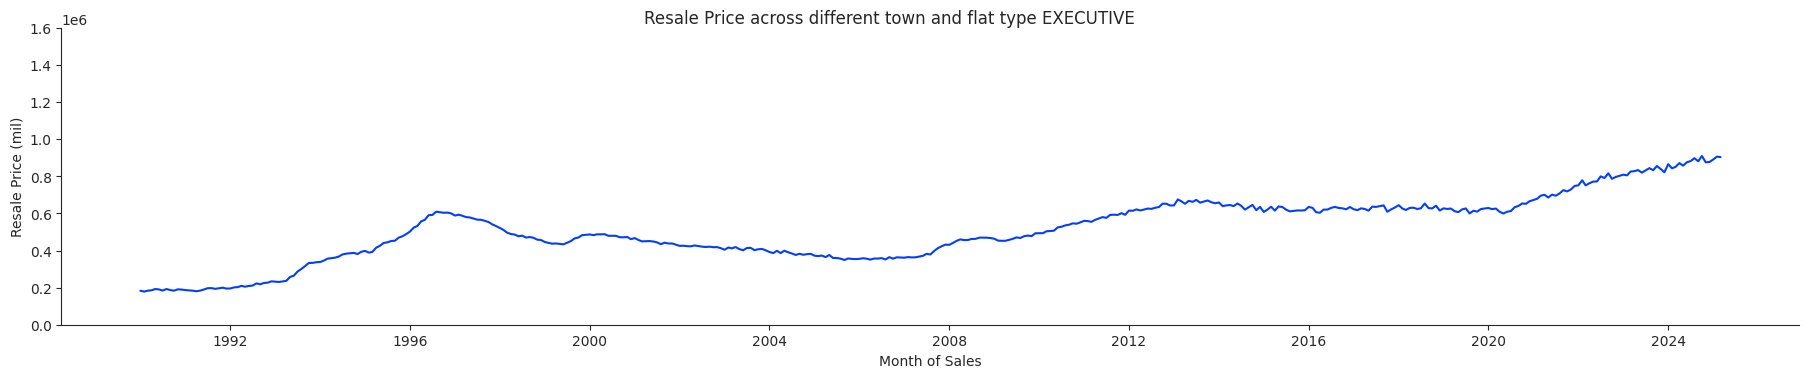

/tmp/ipykernel_32131/3836756993.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

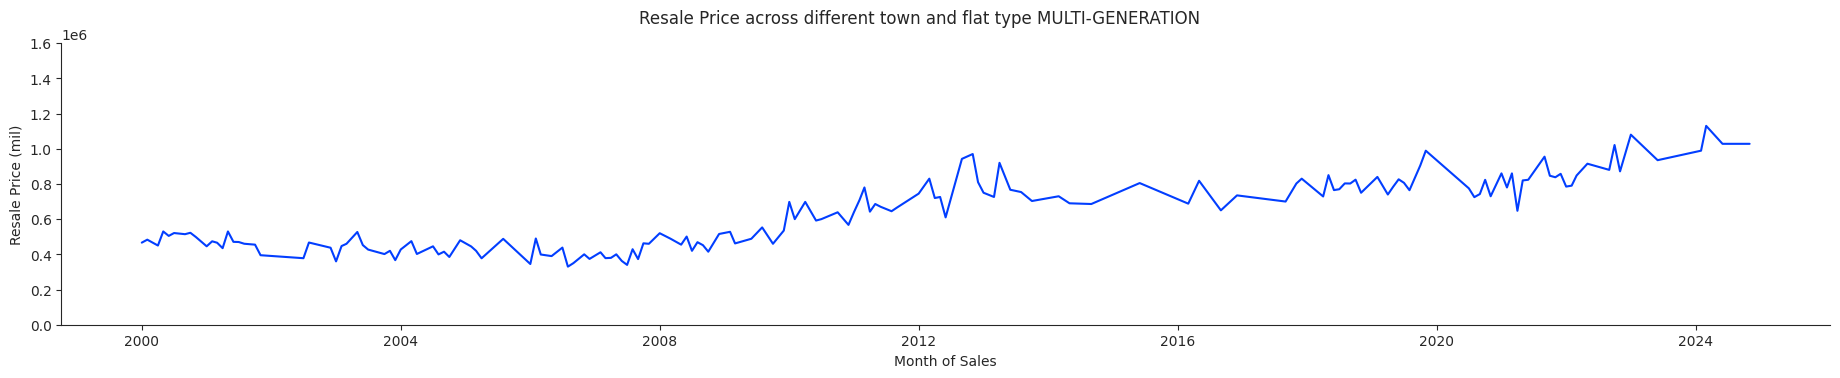

In [24]:
room_list = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
#town_list = []

for room in room_list:
    df_room = df.query("flat_type == @room")
    
    def plot_price(df_room, room):
        sns.set_style("ticks")
        sns.set_palette("bright")
        #hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
        g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line", 
                        height=3.7, aspect=5, palette="bright", ci=None)
        g.fig.suptitle(f"Resale Price across different town and flat type {room}", y=1.01)   
        g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    
    plt.clf()
    plot_price(df_room, room)
    plt.show()
    

In [12]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

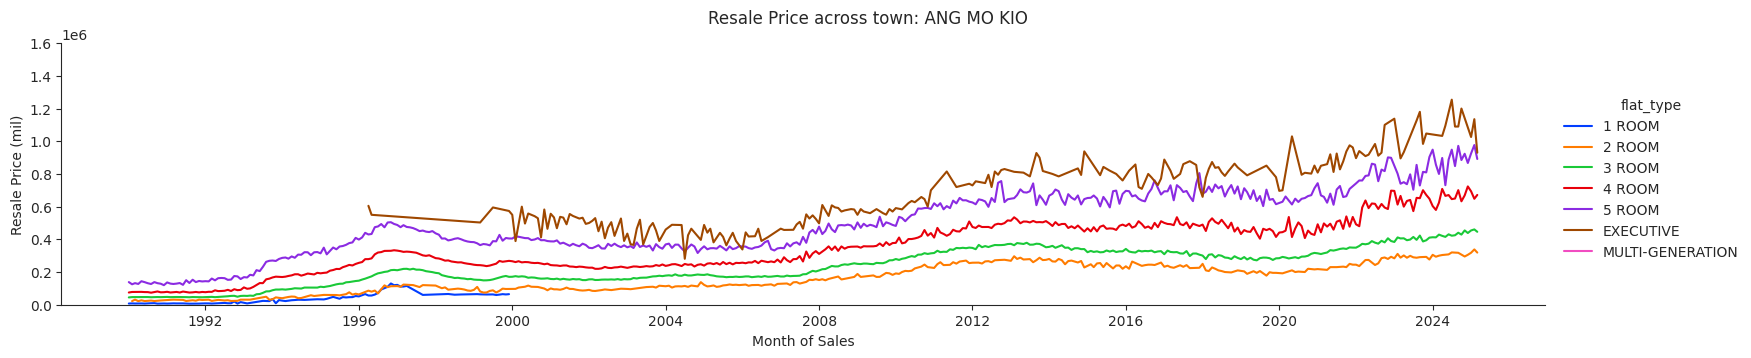

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

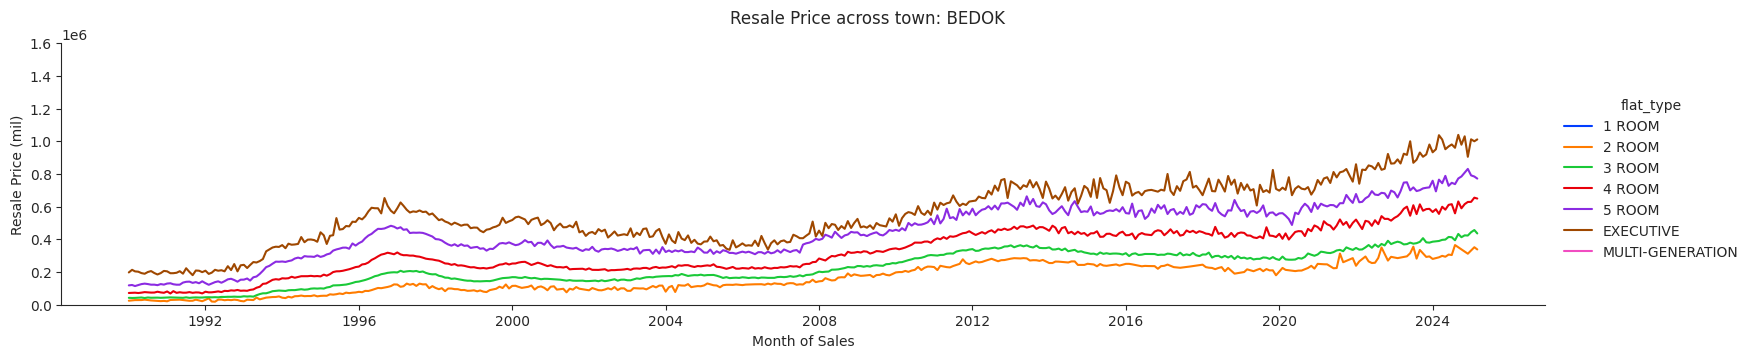

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

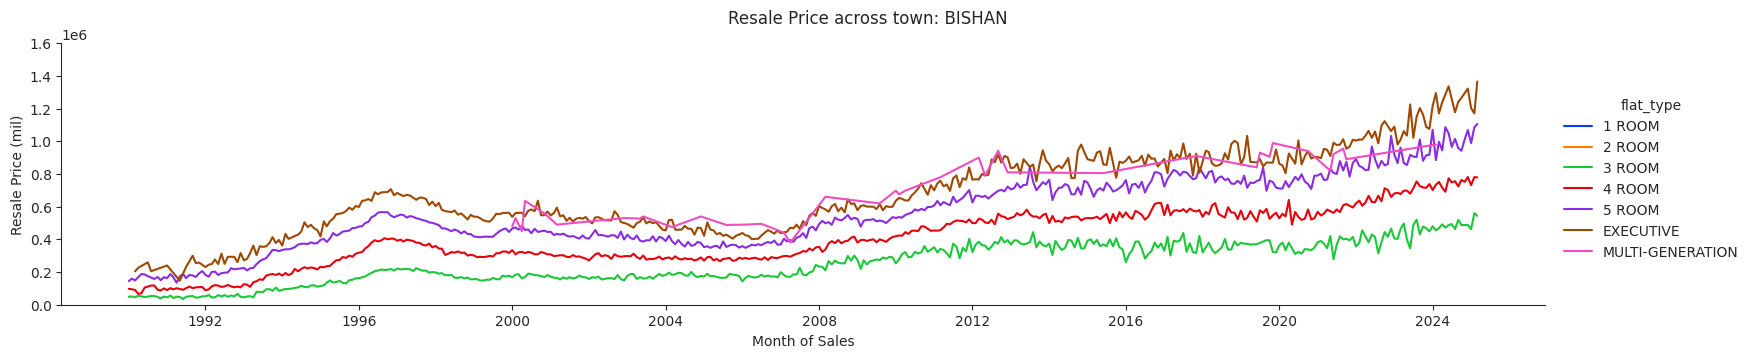

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

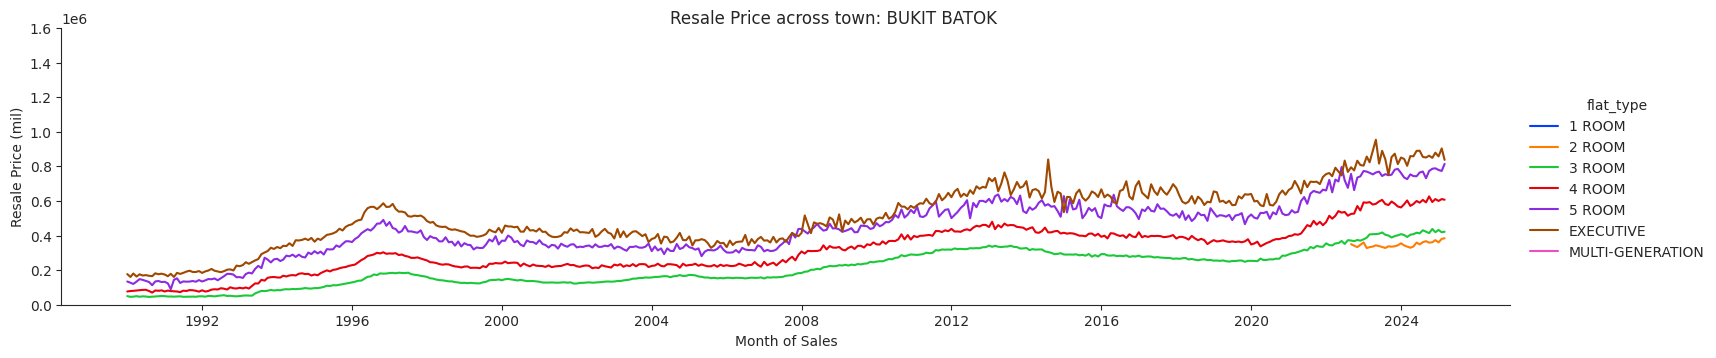

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

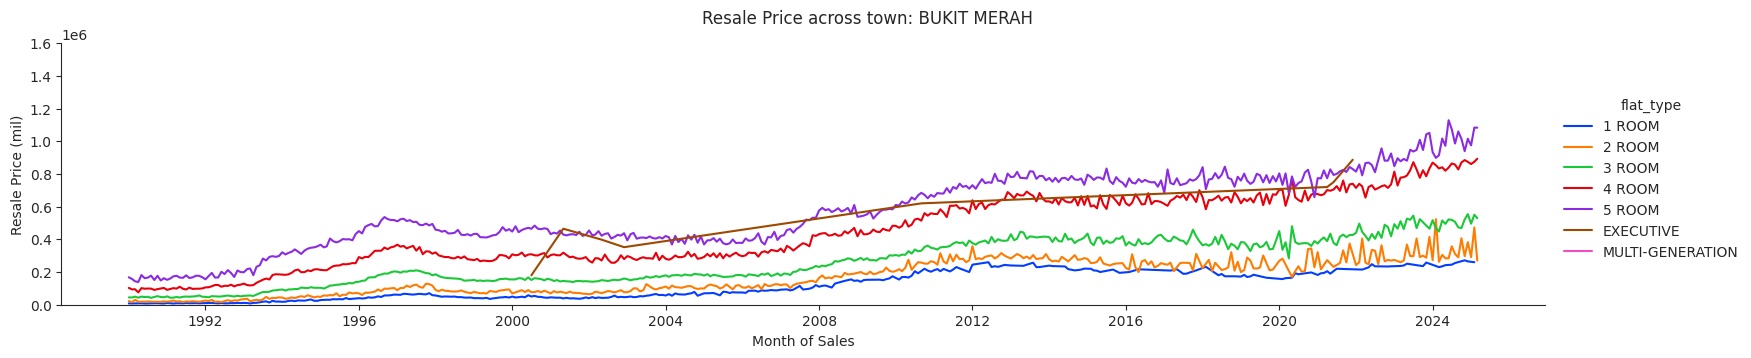

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

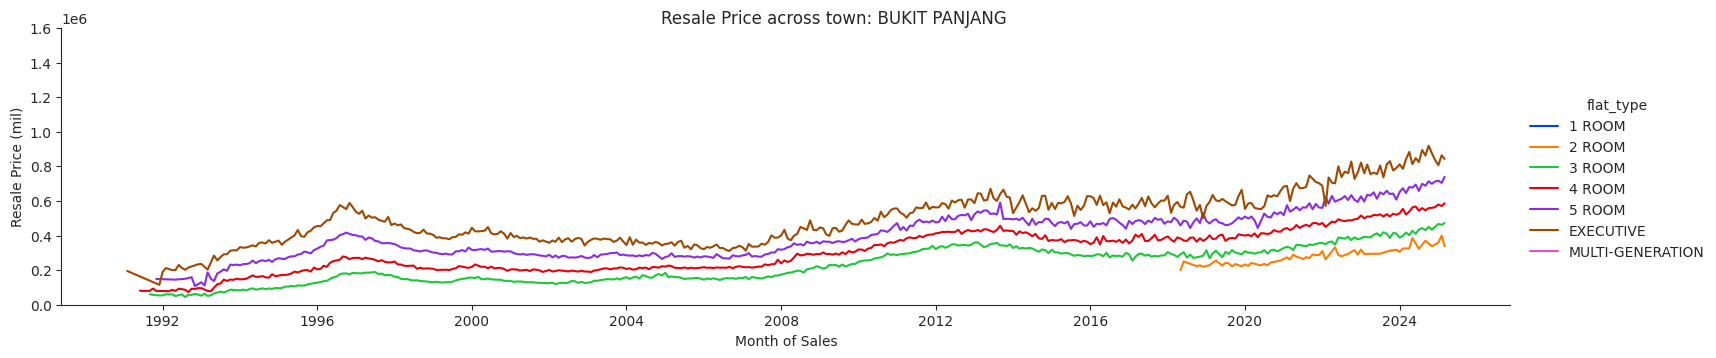

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

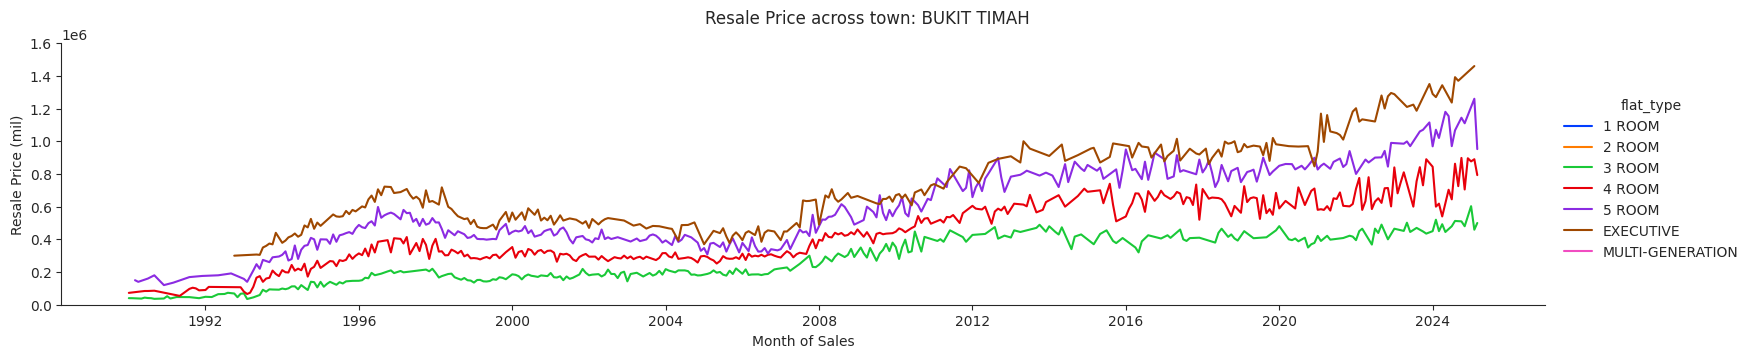

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

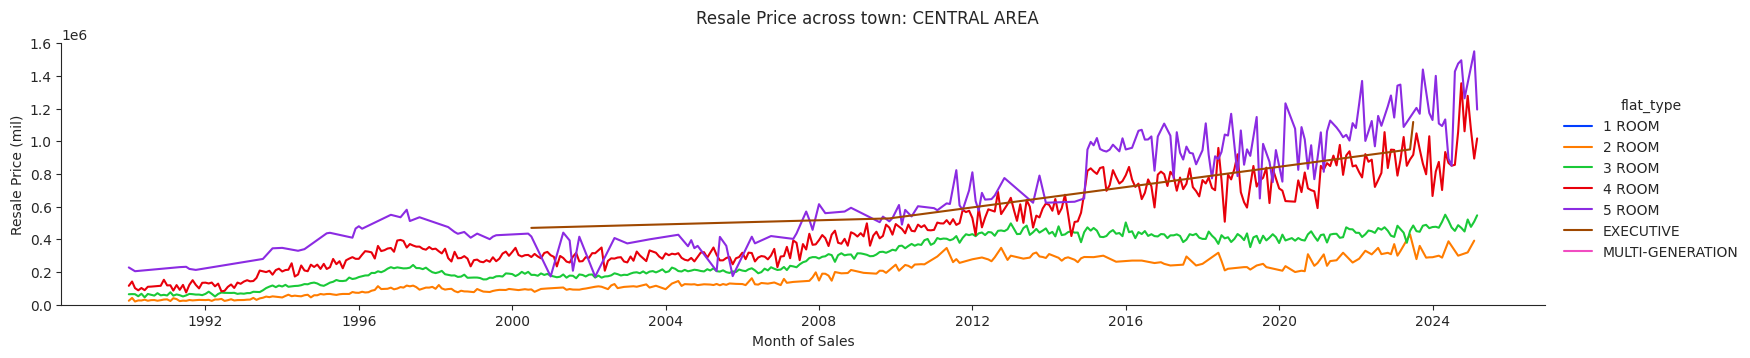

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

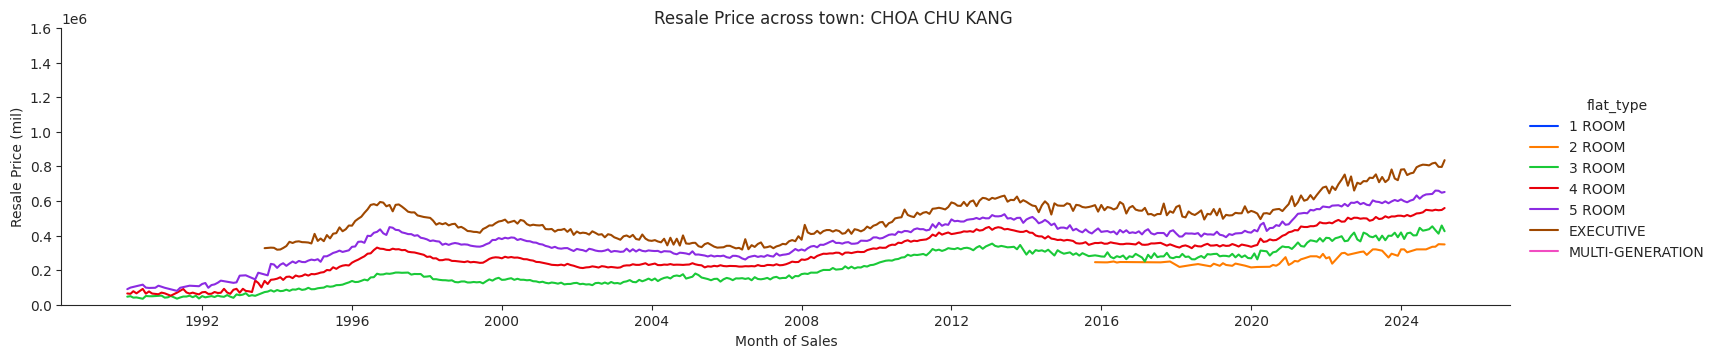

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

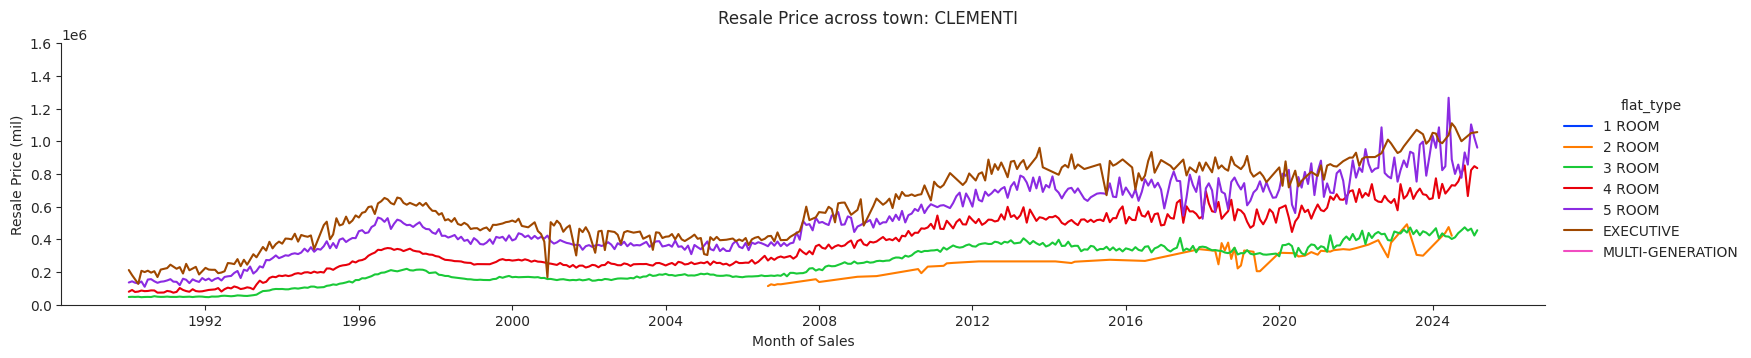

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

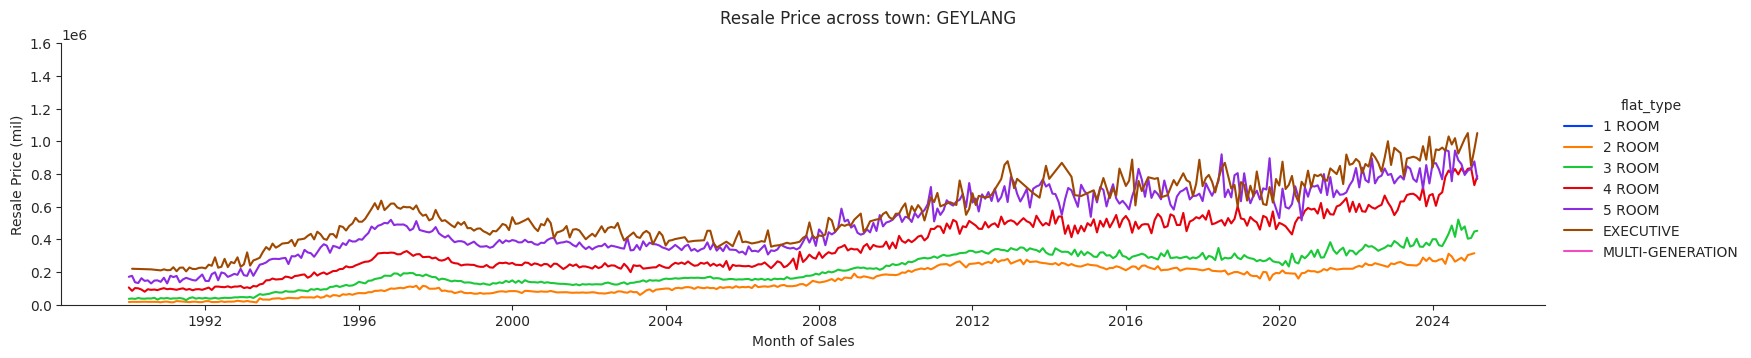

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

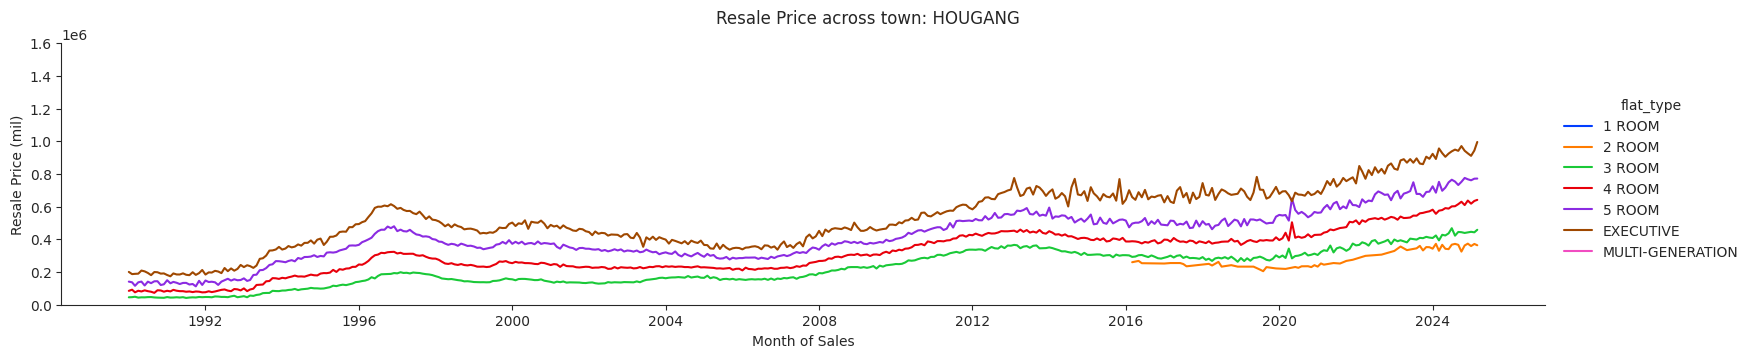

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

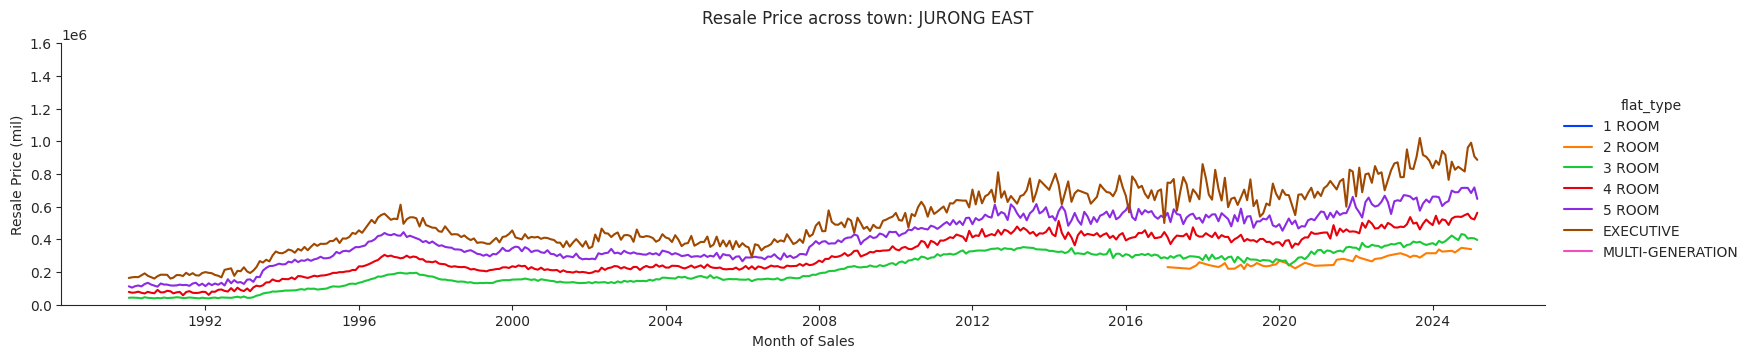

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

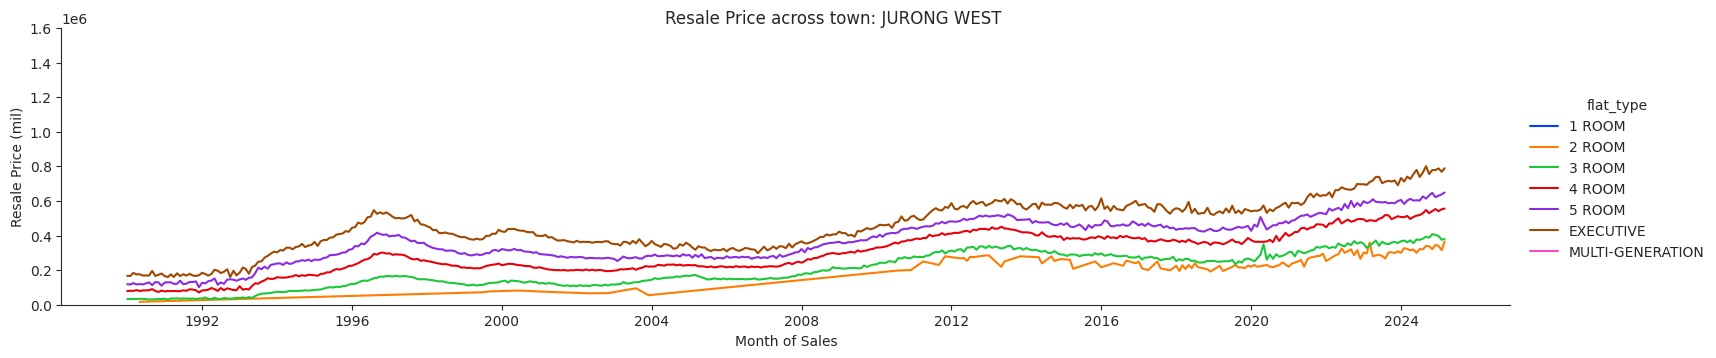

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

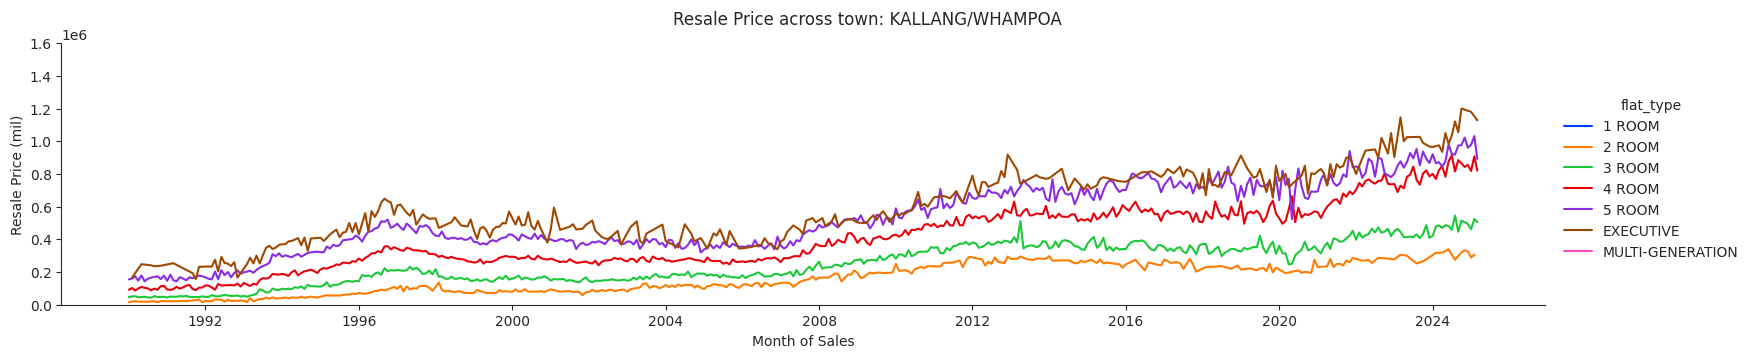

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

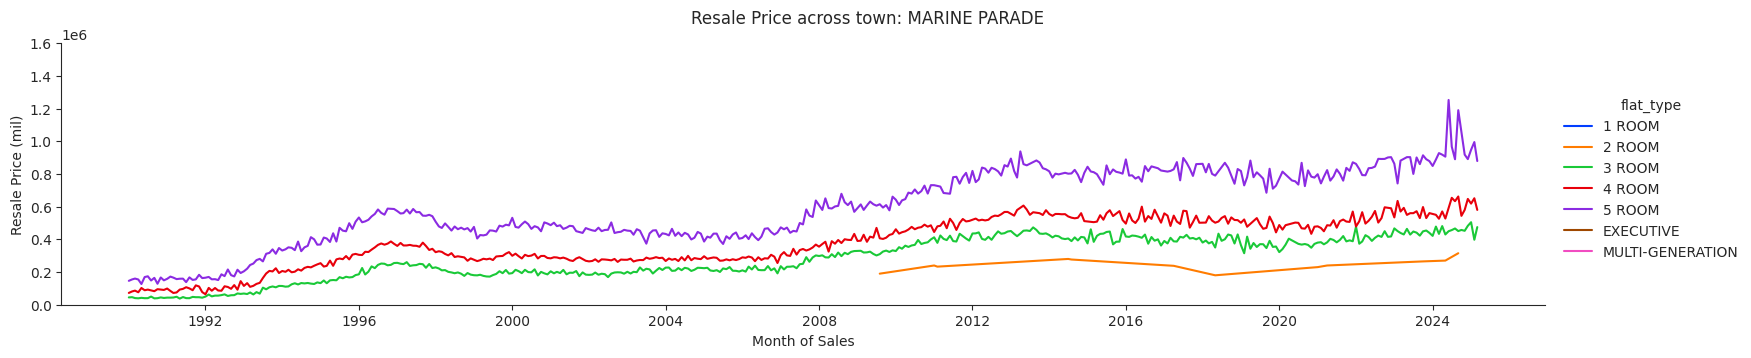

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

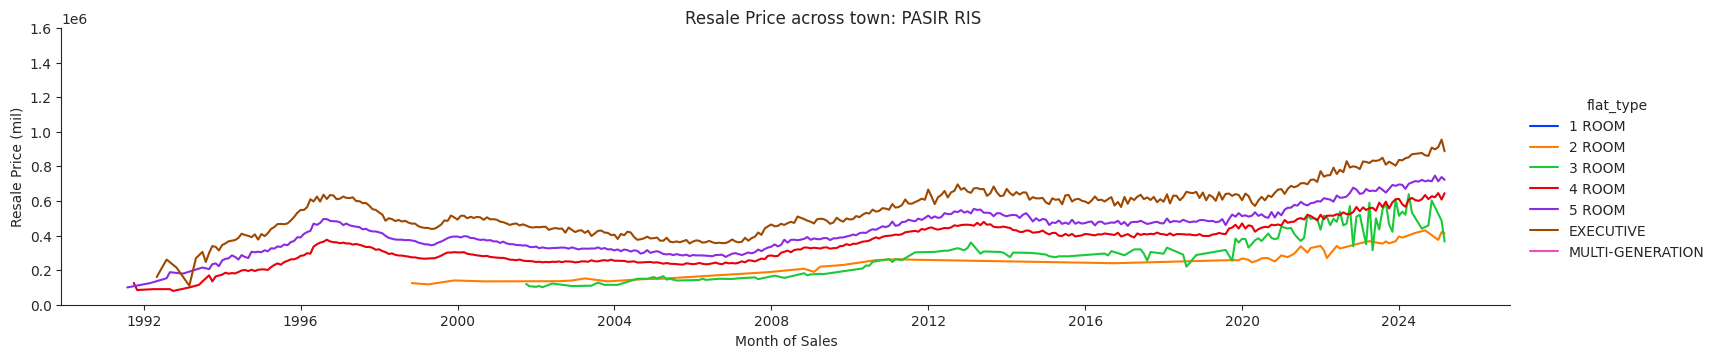

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

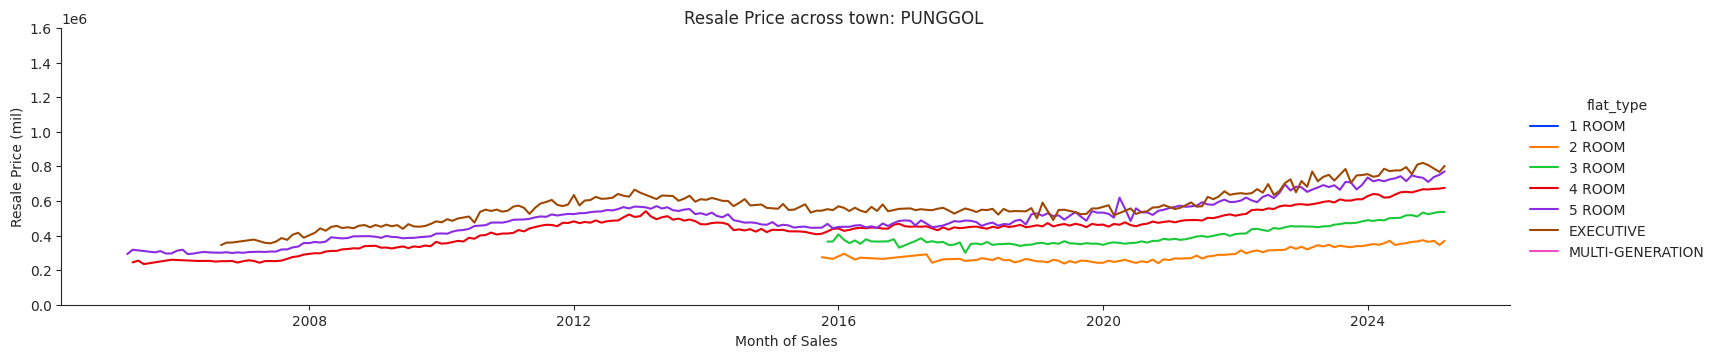

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

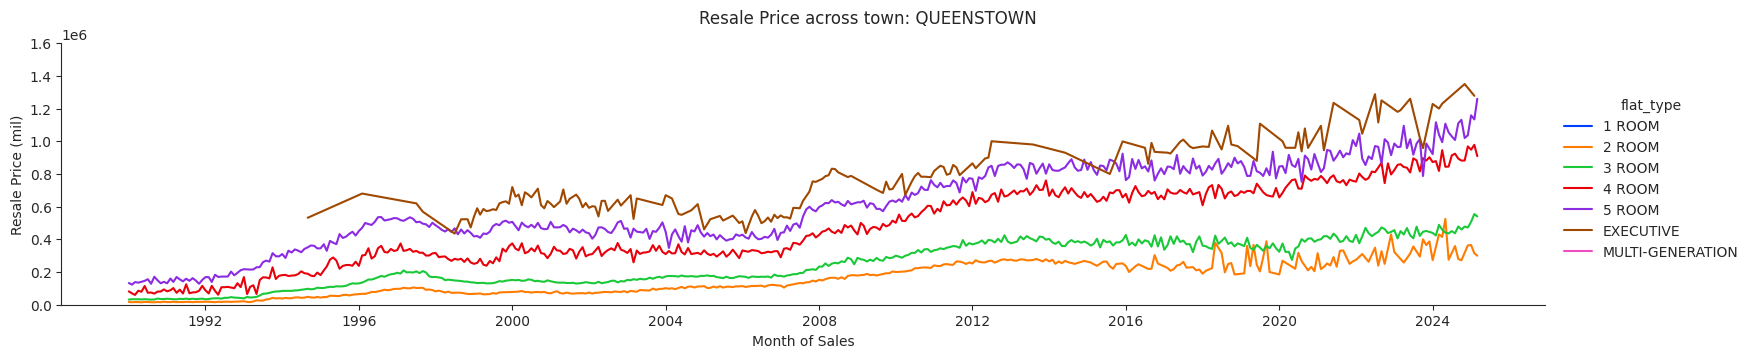

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

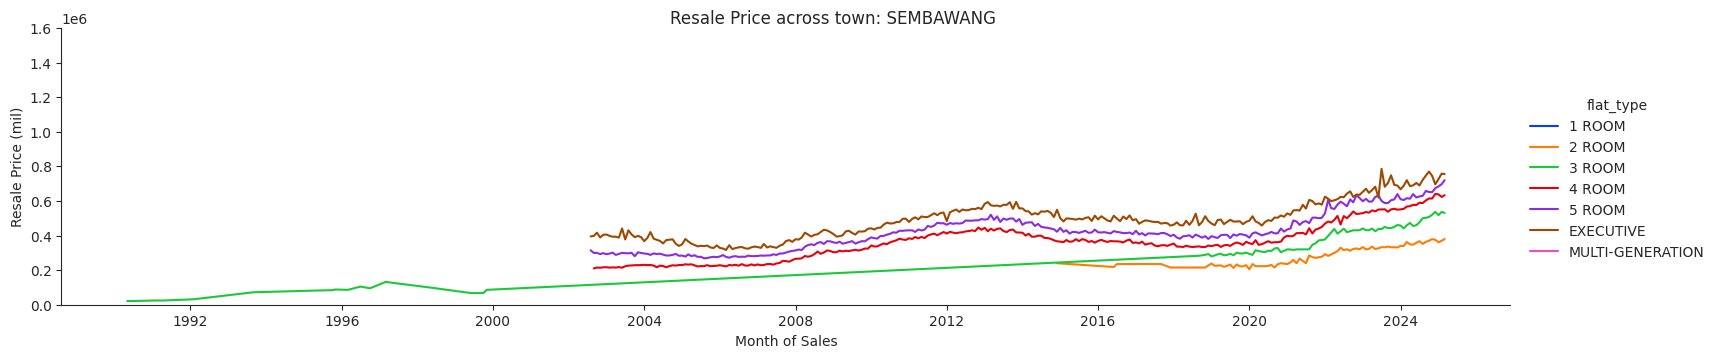

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

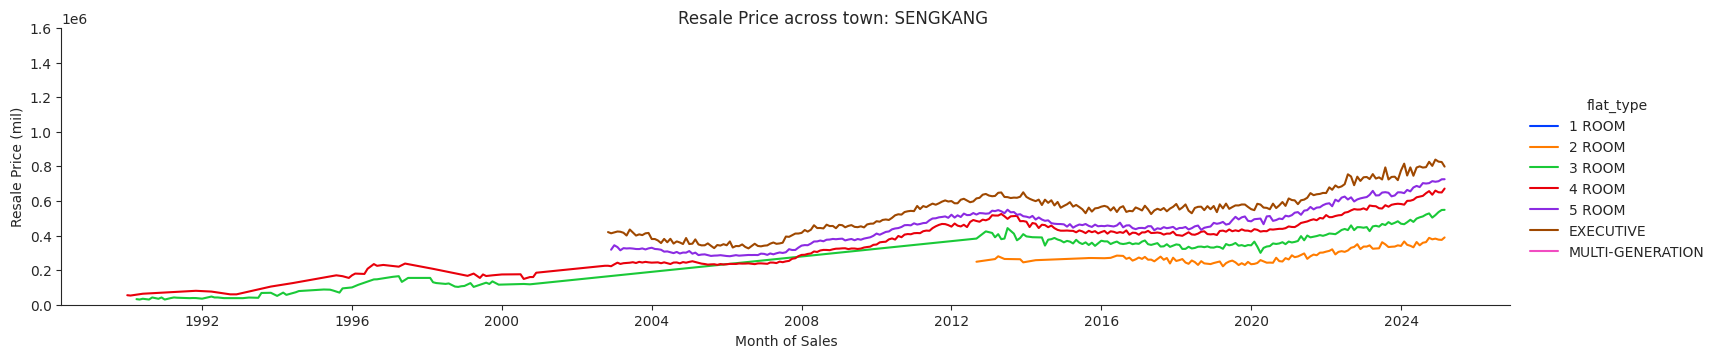

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

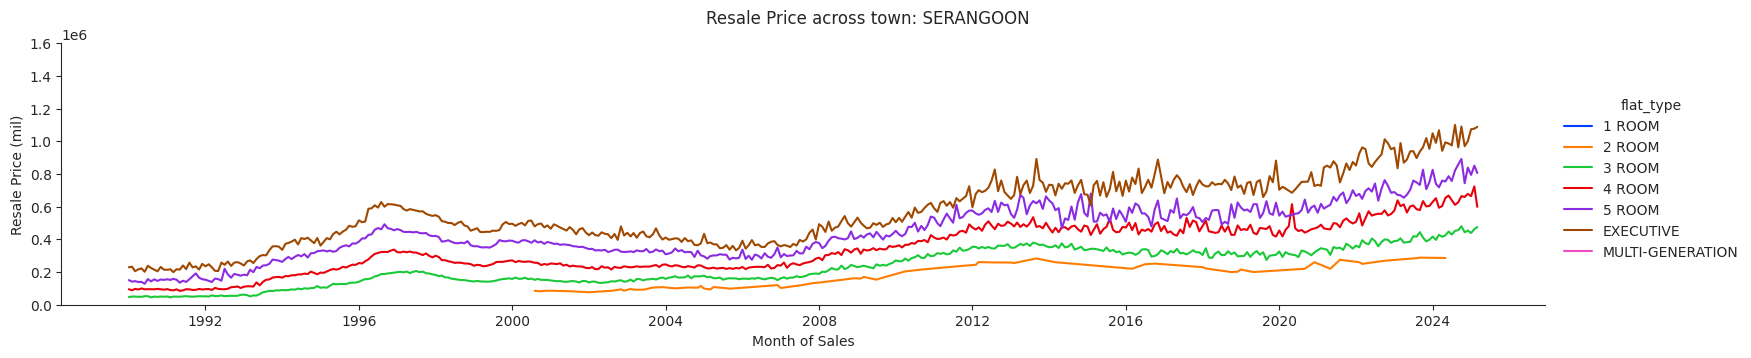

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

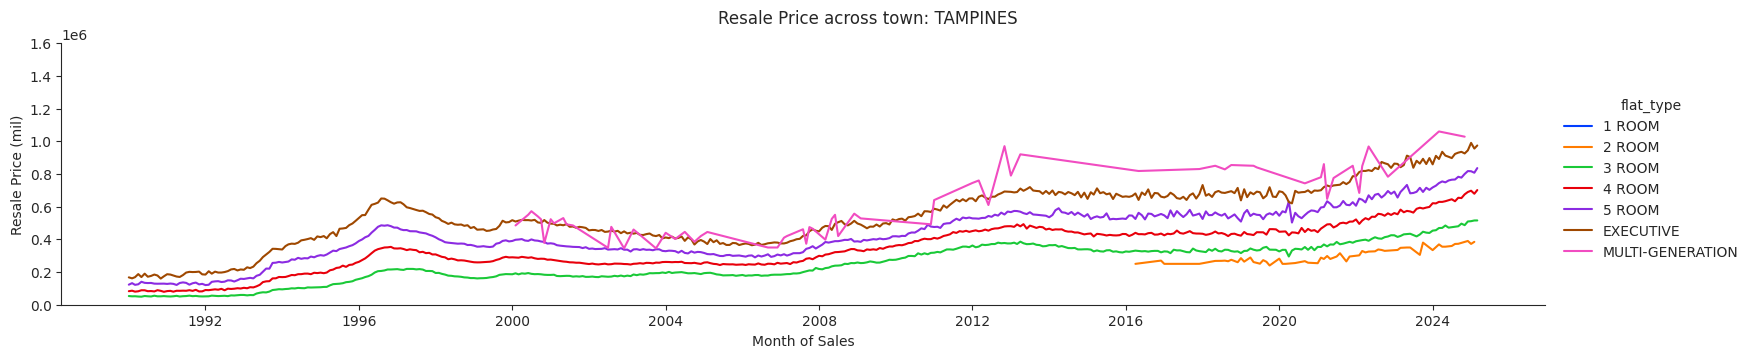

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

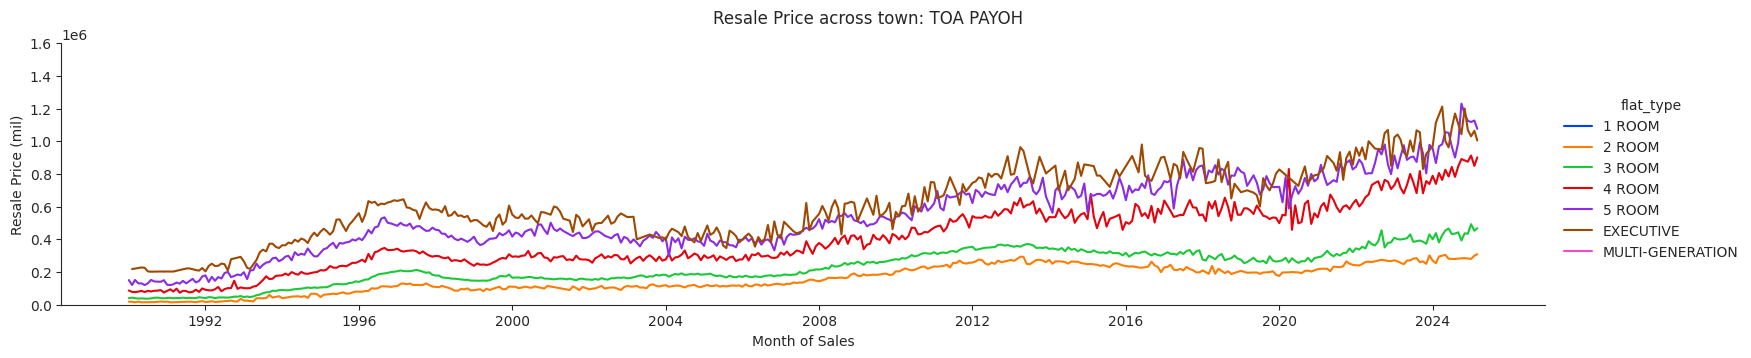

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

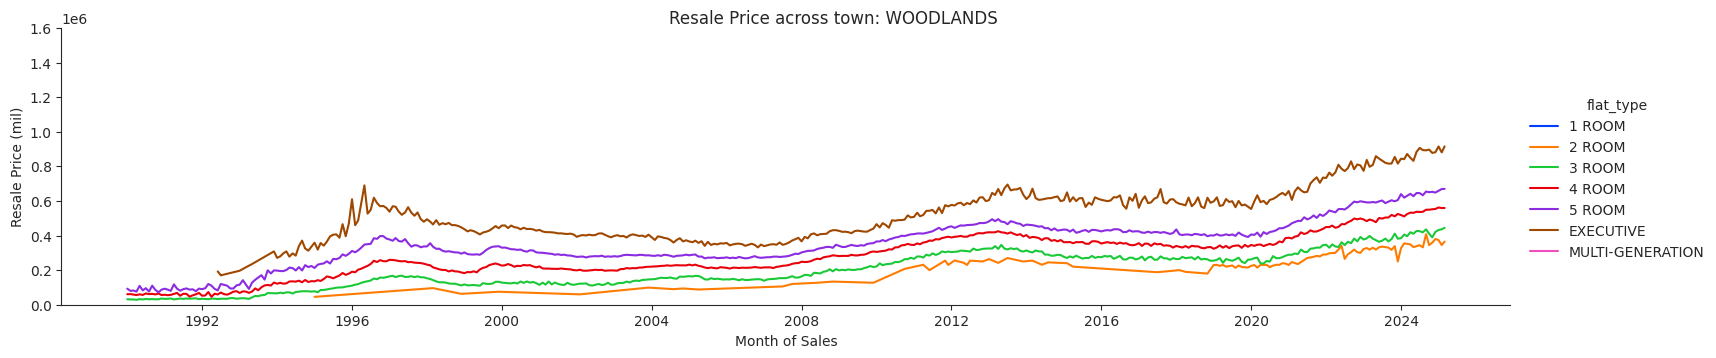

/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

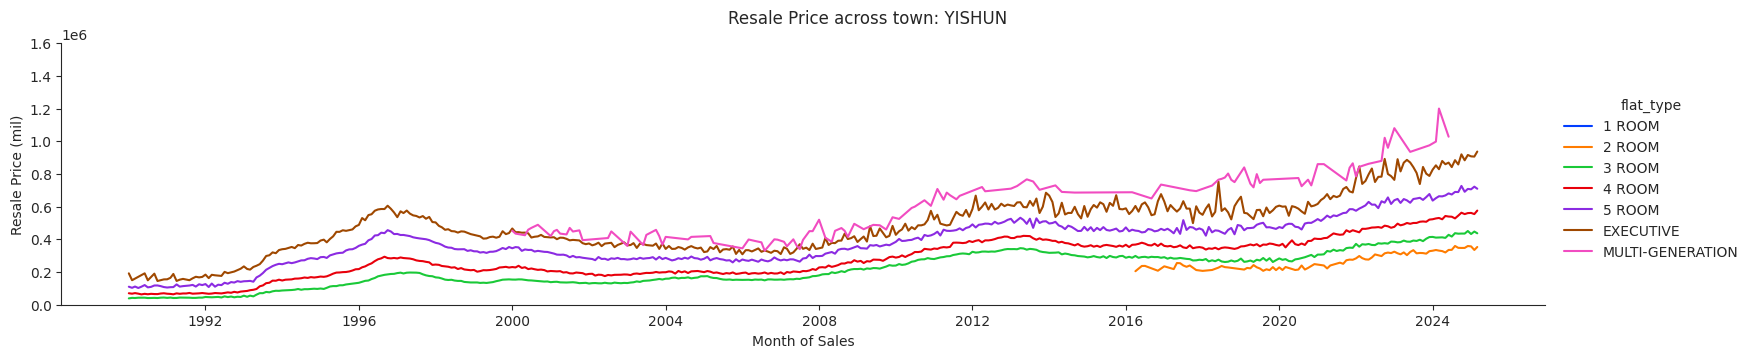

In [25]:
#room_list = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
town_list = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN']

for twn in town_list:
    df_twn = df.query("town == @twn")
    
    def plot_price(df_twn, twn):
        sns.set_style("ticks")
        sns.set_palette("bright")
        hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
        g = sns.relplot(data=df_twn, x="month", y="resale_price", kind="line", 
                        height=3.5, aspect=4.5, palette="bright", ci=None, hue="flat_type", hue_order=hue_order)
        g.fig.suptitle(f"Resale Price across town: {twn}", y=1.01)   
        g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    
    plt.clf()
    plot_price(df_twn, twn)
    plt.show()
    

In [26]:
def plot_box():
    plt.clf()
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    row_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="town", y="resale_price", row="flat_type", row_order=row_order, kind="box",height=2.5, aspect=5, palette="bright")
    g.fig.suptitle("Resale Price VS Flat Type across different town", y=1.01)   
    g.set(ylim=(0, 1_600_000))
    plt.xticks(rotation=90)

/tmp/ipykernel_32131/1367276269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x="town", y="resale_price", row="flat_type", row_order=row_order, kind="box",height=2.5, aspect=5, palette="bright")


<Figure size 640x480 with 0 Axes>

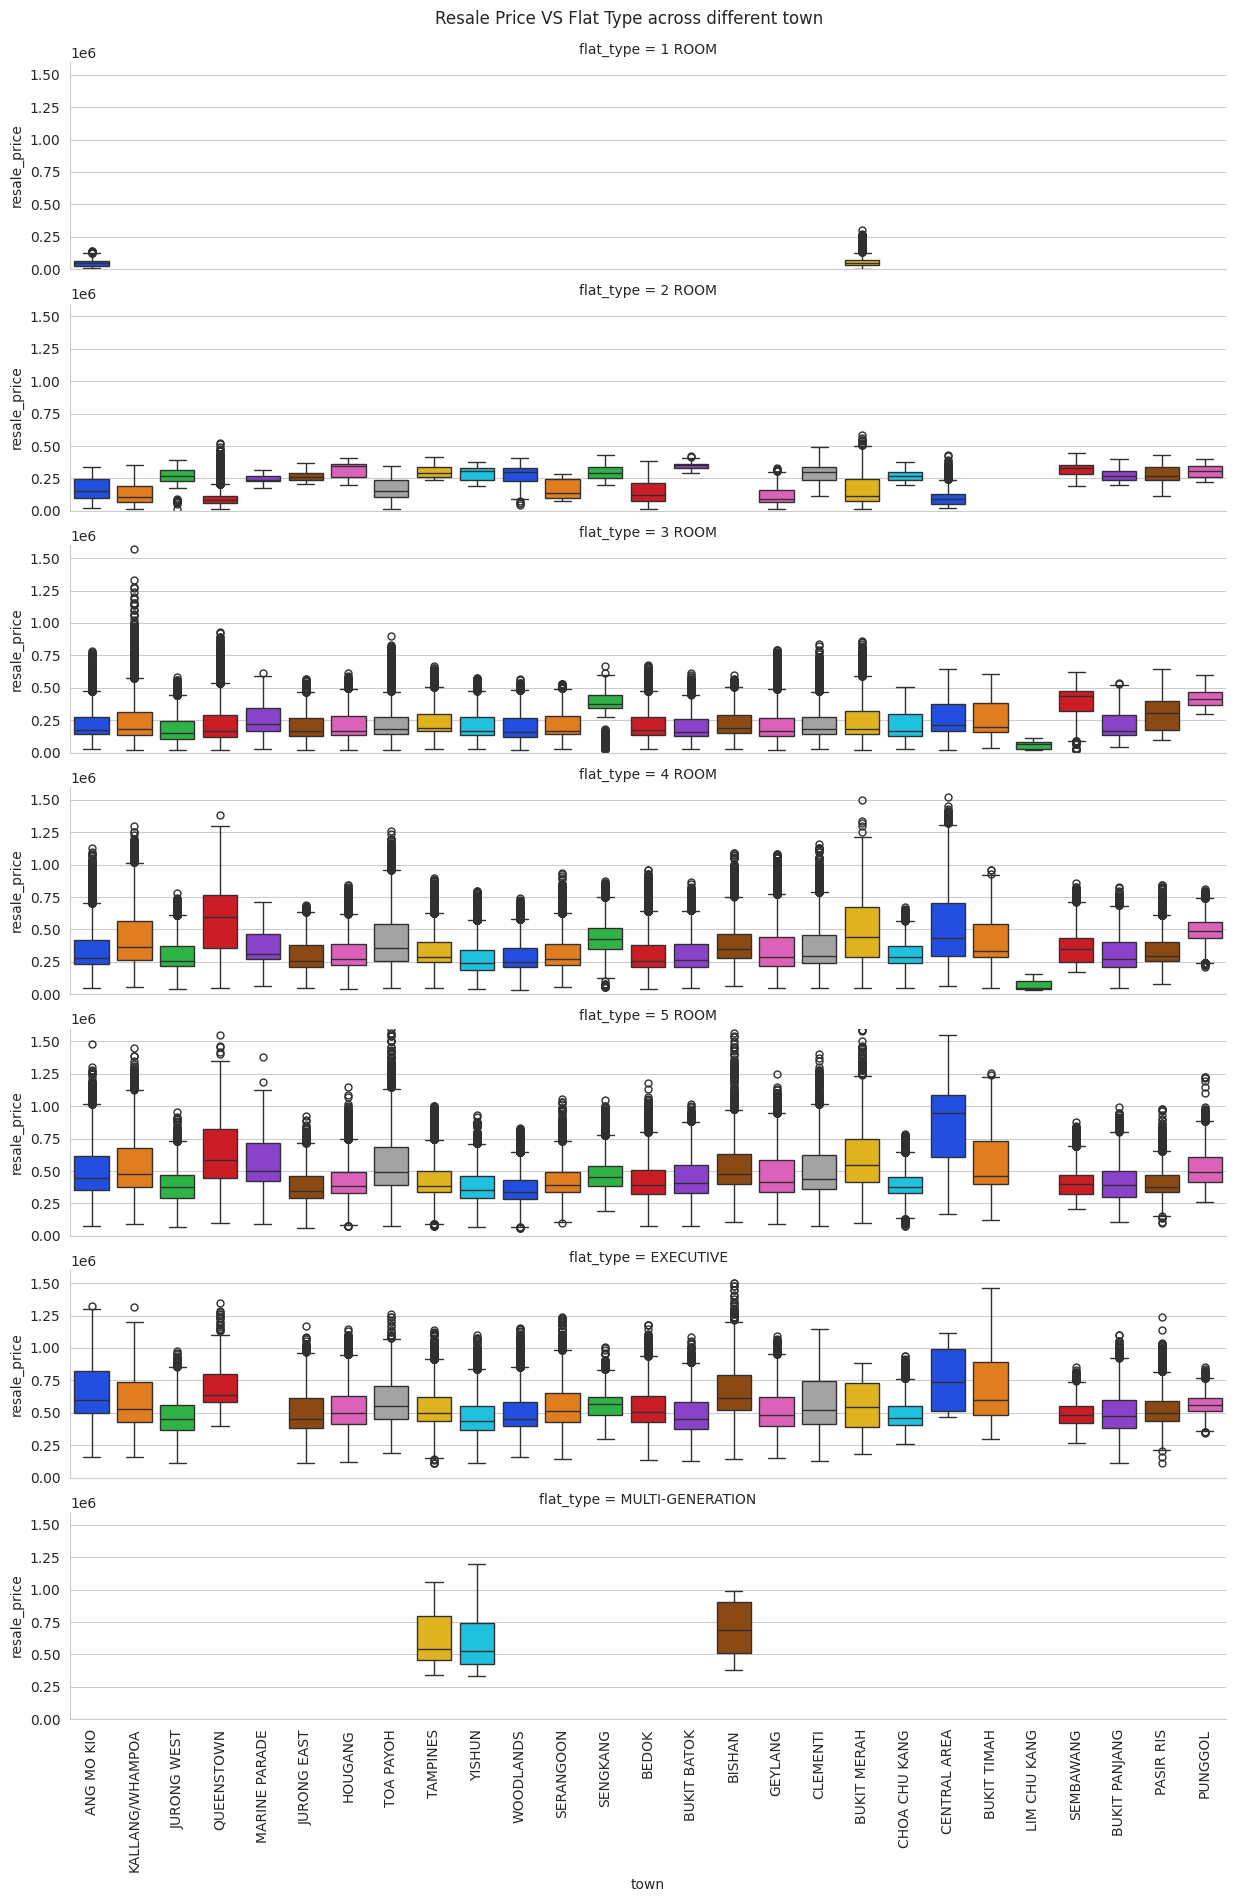

In [27]:
plt.clf()
plot_box()
plt.show()

In [28]:
def plot_bar():
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="resale_price", y="town", hue="flat_type", hue_order=hue_order, kind="bar",height=15, aspect=0.7, ci=None, palette="bright")
    g.fig.suptitle("Mean Resale Price VS Flat Type across different town", y=1.01)  
    g.set(xlim=(0, 1_200_000))

/tmp/ipykernel_32131/2709589933.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x="resale_price", y="town", hue="flat_type", hue_order=hue_order, kind="bar",height=15, aspect=0.7, ci=None, palette="bright")


<Figure size 640x480 with 0 Axes>

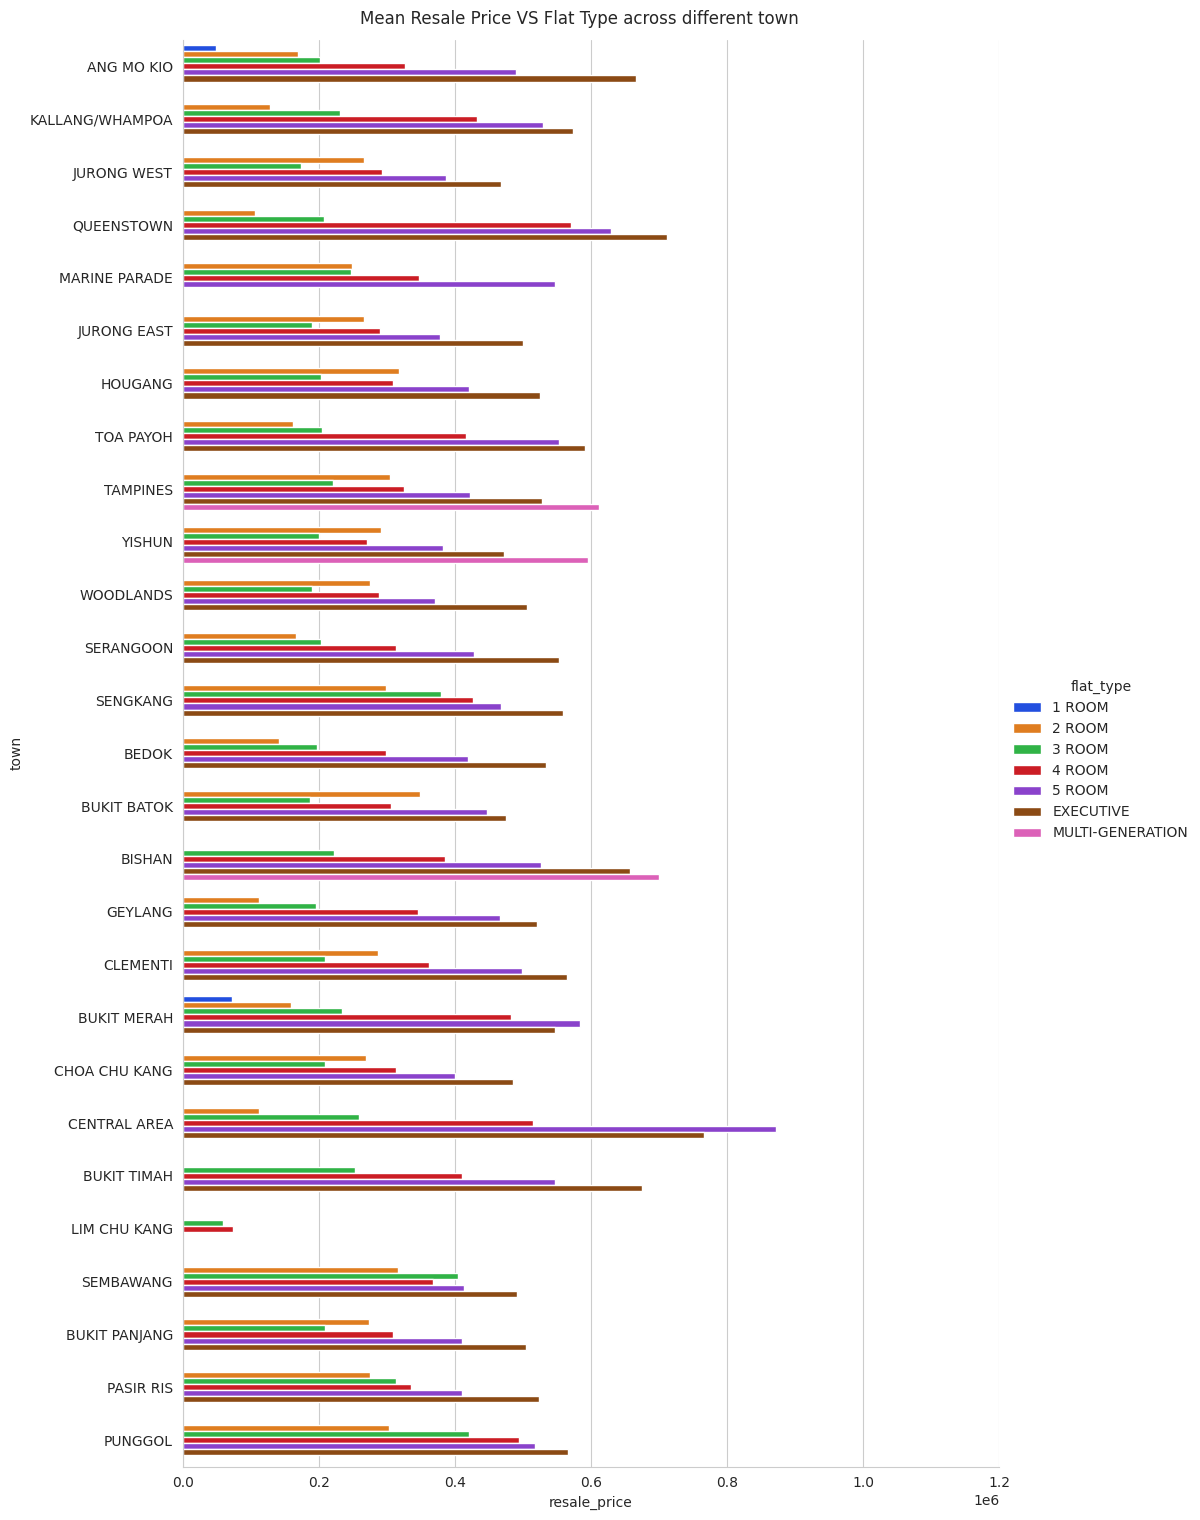

In [29]:
plt.clf()
plot_bar()
plt.show()

In [30]:
def plot_dist():
    sns.set_style("whitegrid")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.displot(data=df, x="resale_price", hue="flat_type", hue_order=hue_order, col="town", col_wrap=3, kind="kde", palette="bright")
    g.fig.suptitle("Kde of resale price across different flat Type and town", y=1.01)       
    g.set(xlim=(0, 1_600_000))

<Figure size 640x480 with 0 Axes>

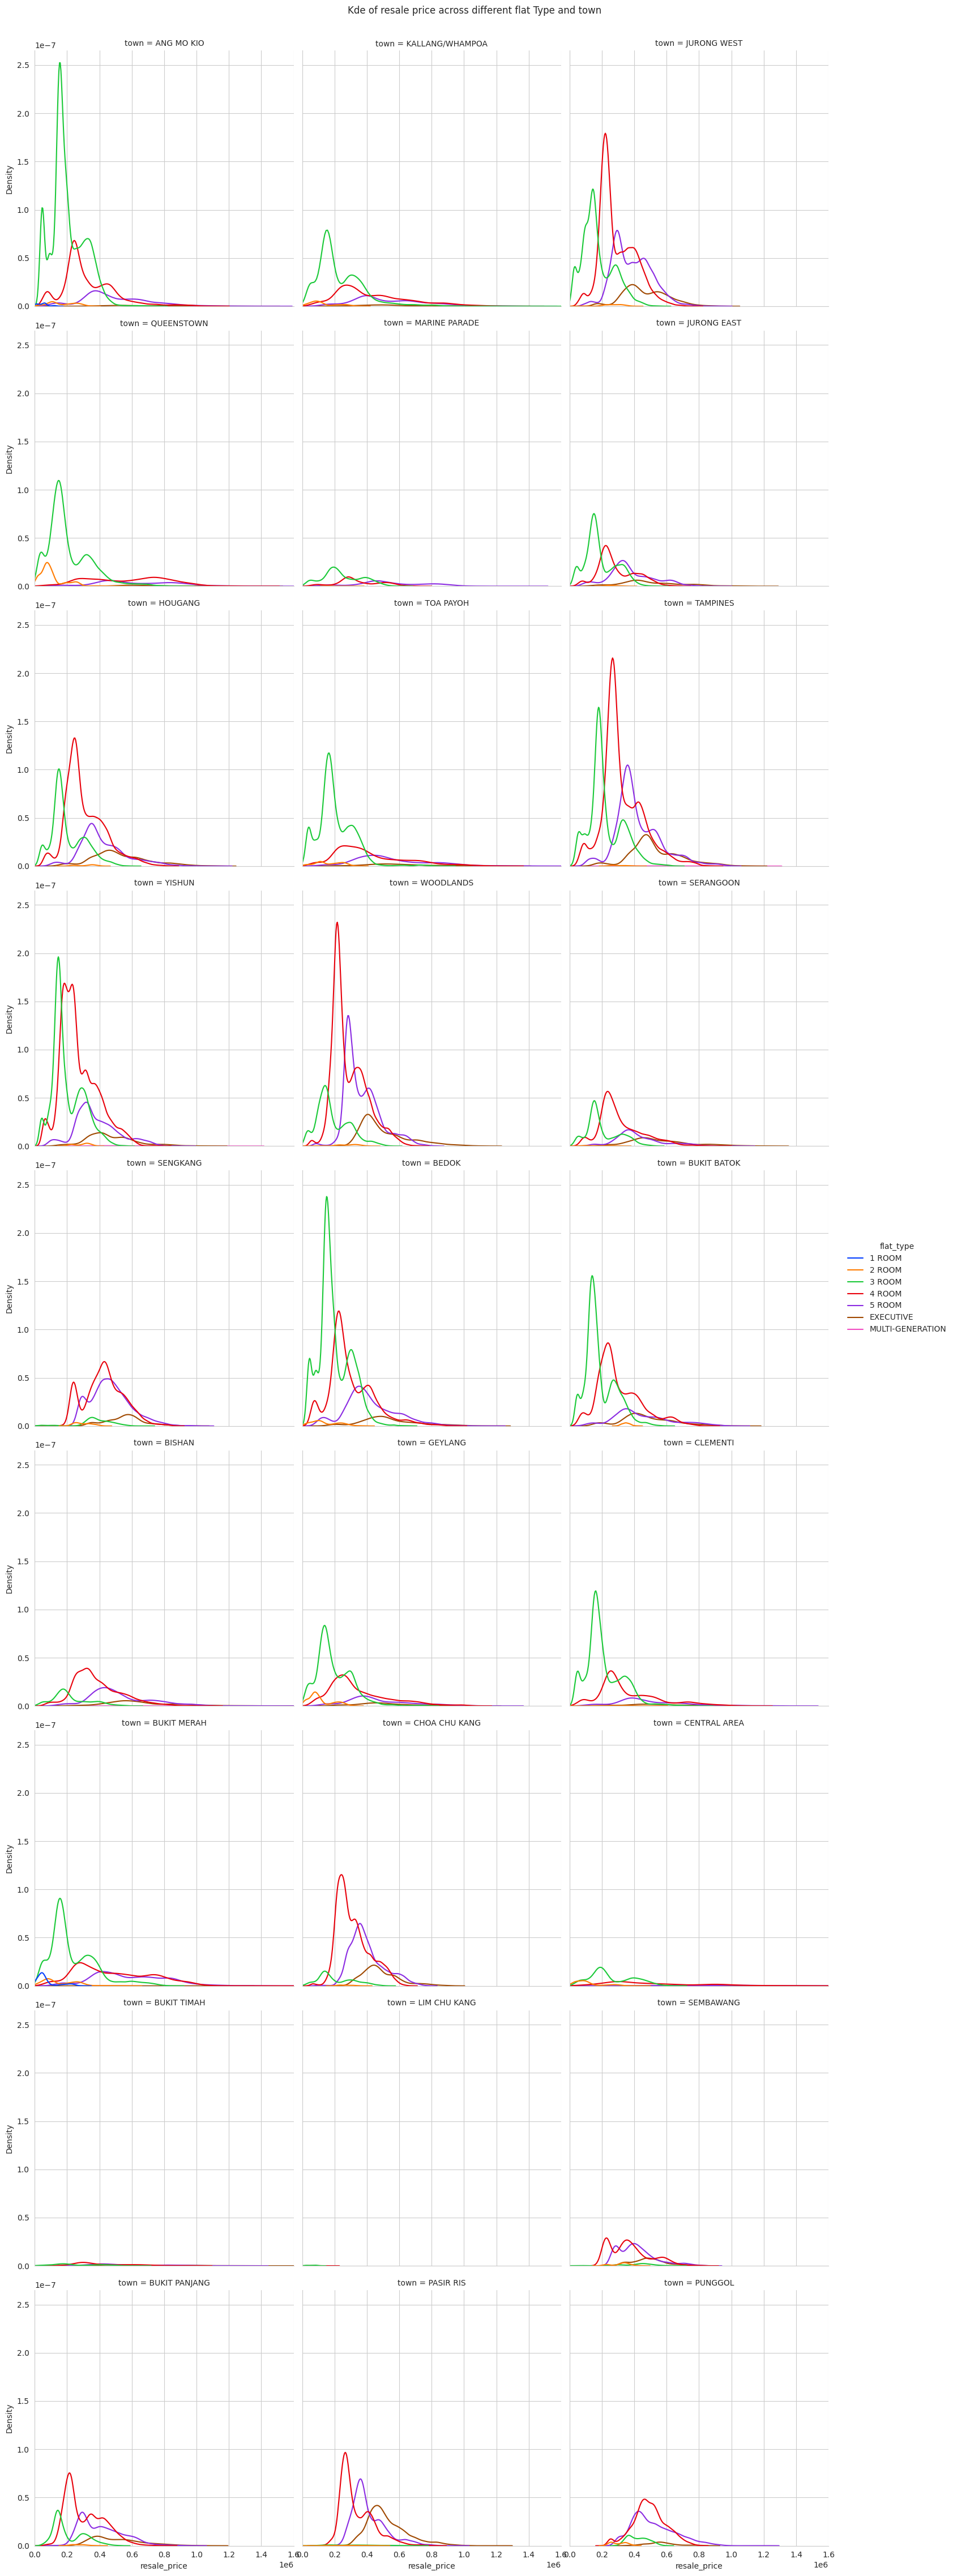

In [31]:
plt.clf()
plot_dist()
plt.show()

In [34]:
def plot_point():
    sns.set_style("ticks")
    sns.set_palette("bright")
    hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="month_of_sales", y="resale_price", row="town", 
                    hue="flat_type", hue_order=hue_order, kind="point", 
                    height=3.7, aspect=5, palette="bright", ci=None)
    g.fig.suptitle("Resale Price VS Mth of Sales across different town and flat type", y=1.01)   
    g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    #plt.xticks(rotation=0)
    #plt.ticklabel_format(style='scientific', axis='y')

/tmp/ipykernel_32131/786416986.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x="month_of_sales", y="resale_price", row="town",


<Figure size 640x480 with 0 Axes>

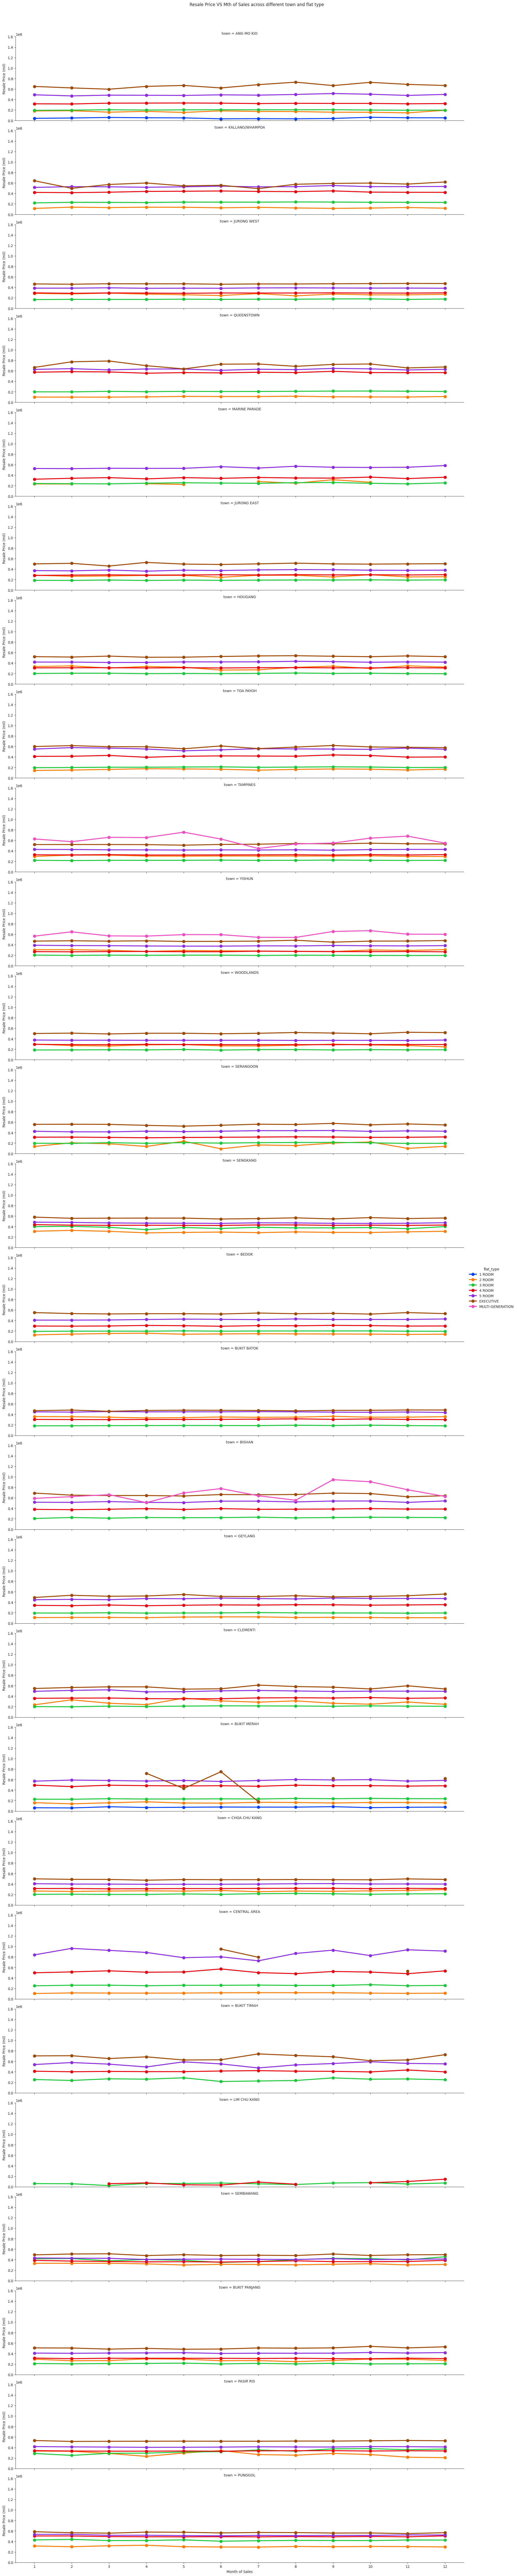

In [35]:
plt.clf()
plot_point()
plt.show()

In [74]:
#df_room = df.query("flat_type == @room")
    
def plot_priceTrend(room, twn):
    
    df_room = df.query("flat_type == @room & town == @twn")
    sns.set_style("ticks")
    sns.set_palette("bright")
    #hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line", 
                    height=5, aspect=1.5, palette="bright", ci=None)
    g.fig.suptitle(f"Resale Price across {twn} and flat type {room}", y=1.01)   
    #g.set(ylim=(0, 1_600_000), xlabel="Month of Sales", ylabel = "Resale Price (mil)")

/tmp/ipykernel_32131/2227586602.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df_room, x="month", y="resale_price", kind="line",
/home/boonk/.pyenv/versions/3.10.6/envs/hdb_resale_chat_bot/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 640x480 with 0 Axes>

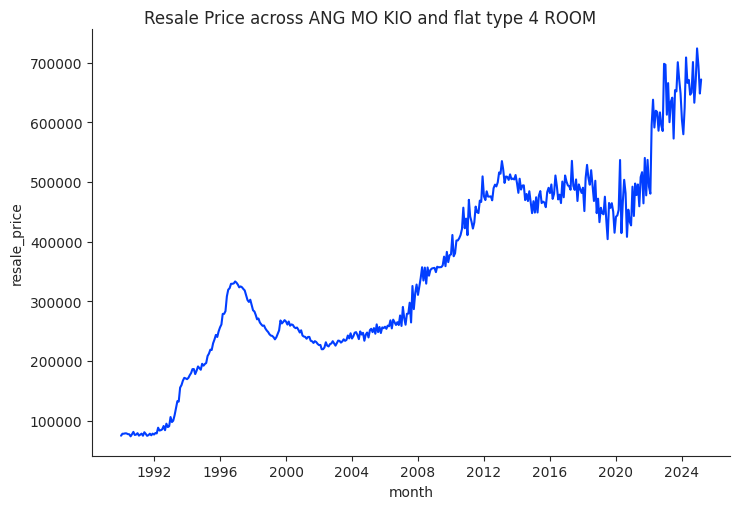

In [75]:
plt.clf()
plot_priceTrend('4 ROOM', 'ANG MO KIO')
plt.show()

In [68]:
def plot_bar2(room, twn):
    
    df_room = df.query("flat_type == @room & town == @twn")
    sns.set_style("ticks")
    sns.set_palette("bright")
    #hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df_room, x="month_of_sales", y="resale_price", kind="bar", 
                    height=5, aspect=1.5, palette="bright", errorbar=None)
    g.fig.suptitle(f"Mean Resale Price VS Mth of Sales across different {twn} and flat type {room}", y=1.01)   
    g.set(xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    #plt.xticks(rotation=0)
    #plt.ticklabel_format(style='scientific', axis='y')

/tmp/ipykernel_32131/1489717649.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_room, x="month_of_sales", y="resale_price", kind="bar",


<Figure size 640x480 with 0 Axes>

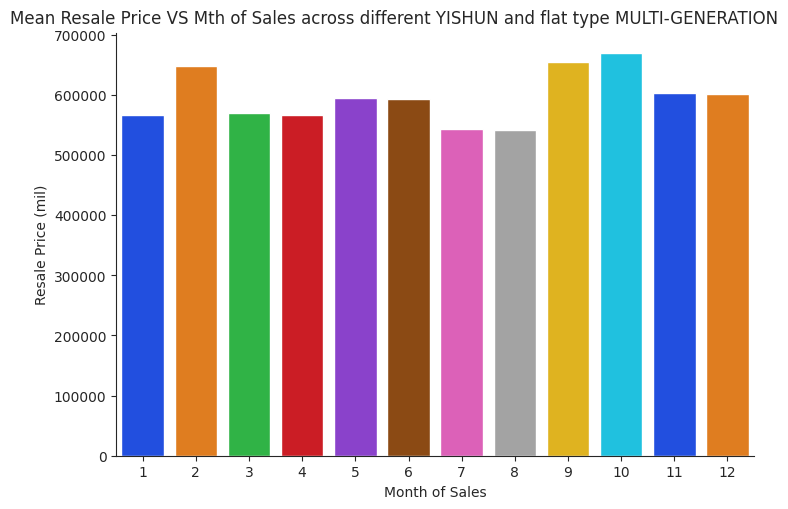

In [76]:
plt.clf()
plot_bar2('MULTI-GENERATION', 'YISHUN')
plt.show()

In [72]:
def plot_bar():
    sns.set_style("ticks")
    sns.set_palette("bright")
    #hue_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM","EXECUTIVE", "MULTI-GENERATION"]
    g = sns.catplot(data=df, x="month_of_sales", y="resale_price", kind="bar", 
                    height=5, aspect=1.5, palette="bright", errorbar=None)
    g.fig.suptitle(f"Mean Resale Price VS Mth of Sales across different town and flat type", y=1.01)   
    g.set(xlabel="Month of Sales", ylabel = "Resale Price (mil)")
    #plt.xticks(rotation=0)
    #plt.ticklabel_format(style='scientific', axis='y')

/tmp/ipykernel_32131/861842992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x="month_of_sales", y="resale_price", kind="bar",


<Figure size 640x480 with 0 Axes>

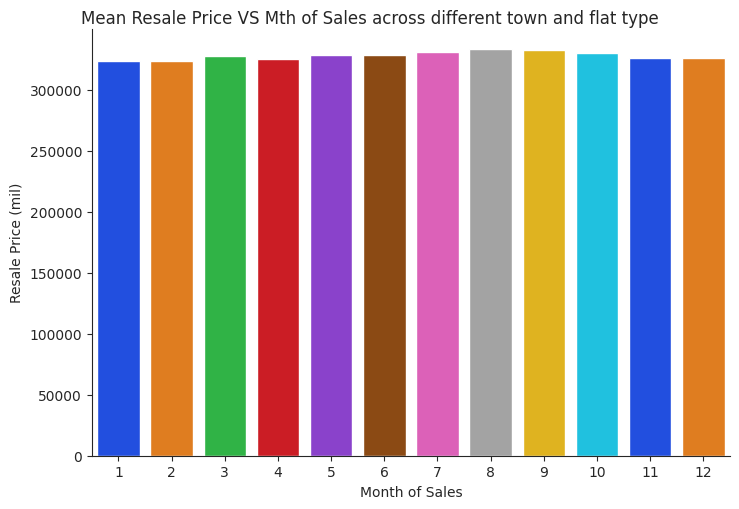

In [73]:
plt.clf()
plot_bar()
plt.show()